In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths and settings
train_dir = r"C:\\Users\\hp\\OneDrive\\Desktop\\Cnn\\brain tumor\\data\\Brain MRI"
img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 47 images belonging to 2 classes.


Found 11 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Save the model
model.save('brain_tumor_cnn_model.h5')


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.5972 - loss: 0.7801 - val_accuracy: 0.4545 - val_loss: 1.5159
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5250 - loss: 2.1215 - val_accuracy: 0.5455 - val_loss: 0.7726
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.6336 - loss: 1.0213 - val_accuracy: 0.7273 - val_loss: 0.4272
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7773 - loss: 0.4721 - val_accuracy: 0.7273 - val_loss: 0.5147
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.7125 - loss: 0.6545 - val_accuracy: 0.6364 - val_loss: 0.5529
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8136 - loss: 0.4765 - val_accuracy: 0.9091 - val_loss: 0.4985
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9574 - loss: 0.3611 - val_accuracy: 0.9091 - val_loss: 0.4428
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9508 - loss: 0.3178 - val_accuracy: 0.9091 - val_loss: 0.3788
Epoch

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the trained model
model = tf.keras.models.load_model('brain_tumor_cnn_model.h5')

# Path to the dataset directory
test_dir = r"C:\\Users\\hp\\OneDrive\\Desktop\\Cnn\\brain tumor\\data\\Brain MRI"

# Image dimensions and batch size
img_height, img_width = 128, 128
batch_size = 32

# Prepare the test data generator
datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Ensures predictions match file order
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Found 58 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9666 - loss: 0.1774 
Test Accuracy: 96.55%
Test Loss: 0.1722


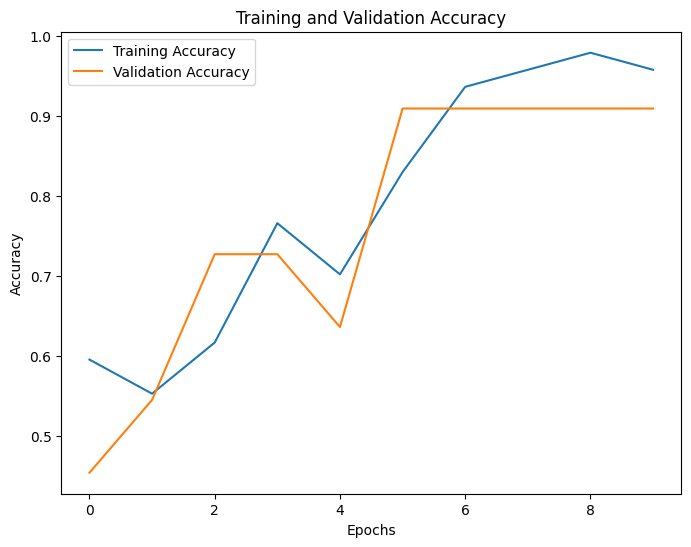

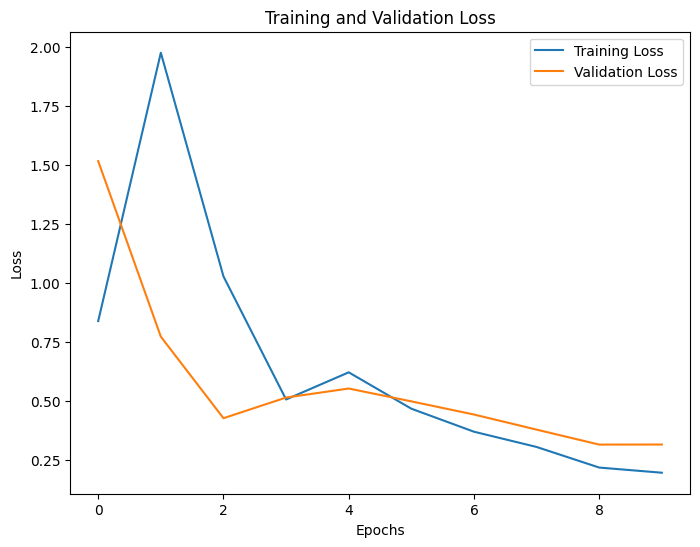

In [8]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the test dataset
predictions = model.predict(test_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)  # Convert probabilities to binary classes

# True labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step 


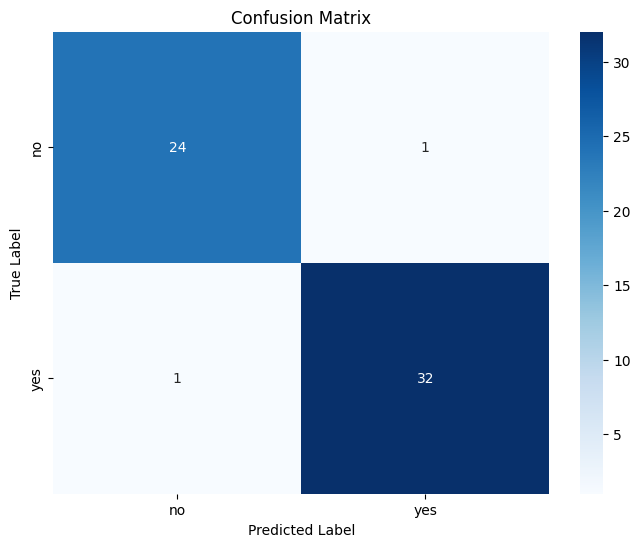

In [11]:
# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.96      0.96        25
         yes       0.97      0.97      0.97        33

    accuracy                           0.97        58
   macro avg       0.96      0.96      0.96        58
weighted avg       0.97      0.97      0.97        58

